# Library

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import time

# CLASSIFICATION LIBRARY
    #Models the classification
from sklearn.neighbors         import KNeighborsClassifier 
from sklearn.tree              import DecisionTreeClassifier
from sklearn.ensemble          import RandomForestClassifier
from sklearn.linear_model      import LogisticRegression

    # Metrics the classification
from sklearn.metrics   import accuracy_score
from sklearn.metrics   import recall_score
from sklearn.metrics   import precision_score
from sklearn.metrics   import f1_score
import numpy as np

# REGRESSION LIBRARY
    #  Metrics the regression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

    # Models the Regression
from sklearn.linear_model   import LinearRegression
from sklearn.tree           import DecisionTreeRegressor
from sklearn.ensemble       import RandomForestRegressor
from sklearn.preprocessing  import PolynomialFeatures
from sklearn.linear_model   import Ridge, Lasso, ElasticNet

# CLUSTER LIBRARY
    # Models
from sklearn.cluster import KMeans
from sklearn.cluster import AffinityPropagation

    # Metrics
from sklearn.metrics import silhouette_score






# Classification

## Create DataFrame the Register


In [30]:
Results_classication = pd.DataFrame()

for index in range(0,25,1):
    Results_classication.loc[index, 'Modelo'   ] = 0
    Results_classication.loc[index, 'What_is'  ] = 0
    Results_classication.loc[index, 'Accuracy' ] = 0
    Results_classication.loc[index, 'Precision'] = 0
    Results_classication.loc[index, 'Recall'   ] = 0
    Results_classication.loc[index, 'F1_score' ] = 0


## Function metrics


In [31]:
def metricas( y_train, y_pred_train,   y_test, y_pred_test,   y_val, y_pred_val):
    # Informações dos parâmetros!
        # y_train      : A resposta original ao conjunto treinamento.
        # y_pred_train : Resultado da predição ao conjunto treinamento feito pelo modelo.    
        # y_test       : A resposta original ao conjunto teste.
        # y_pred_test  : Resultado da predição ao conjunto teste feito pelo modelo.    
        # y_val        : A resposta original ao conjunto validação.
        # y_pred_val   : Resultado da predição ao conjunto validação feito pelo modelo.    
        # return( [accuracy_train,  accuracy_test,  accuracy_val ], 
           #      [precision_train, precision_test, precision_val], 
           #      [recall_train,    recall_test,    recall_val], 
           #      [f1_score_train,  f1_score_test,  f1_score_val])
   
    # Train
        # ACCURACY
    accuracy_train  = accuracy_score(y_train, y_pred_train)
        # Precision 
    precision_train = precision_score(y_train, y_pred_train)
        # Recall 
    recall_train    = recall_score(y_train, y_pred_train)
        # F1-Score
    from sklearn.metrics import f1_score
    f1_score_train  = f1_score(y_train, y_pred_train)   


    # Test
        # ACCURACY
    accuracy_test  = accuracy_score(y_test, y_pred_test)
        # Precision 
    precision_test = precision_score(y_test, y_pred_test)
        # Recall 
    recall_test    = recall_score(y_test, y_pred_test)
        # F1-Score
    from sklearn.metrics import f1_score
    f1_score_test  = f1_score(y_test, y_pred_test)

    # Validation
        # ACCURACY
    accuracy_val  = accuracy_score(y_val, y_pred_val)
        # Precision 
    precision_val = precision_score(y_val, y_pred_val)
        # Recall 
    recall_val    = recall_score(y_val, y_pred_val)
        # F1-Score
    from sklearn.metrics import f1_score
    f1_score_val  = f1_score(y_val, y_pred_val)

    return( [accuracy_train,  accuracy_test,  accuracy_val ], 
            [precision_train, precision_test, precision_val], 
            [recall_train,    recall_test,    recall_val], 
            [f1_score_train,  f1_score_test,  f1_score_val])



#  Function Register

def register(df, model_name, accuracy, precision, recall, f1_score ):
    # Informações dos parâmetros!
        # model_name : Nome do modelo
        # accuracy   : Resultado da predição na métrica accuracy em uma lista [train, test, val ]
        # precision  : Resultado da predição na métrica prercision em uma lista [train, test, val ]
        # recall     : Resultado da predição na métrica recall em uma lista [train, test, val ]
        # f1_score   : Resultado da predição na métrica f1-score em uma lista [train, test, val ]
        # what_is    : essas métricas vem de um treinamento, teste ou validação (train, test, validadion)
        # index      : Em relação ao dataset forneicido em qual index começar registrar essas informações (1,2,3...), só um número por vez!
        # df         : Dataframe em que deve fazer o registro
        #return      : Dataframe alterado


    # Distribuir 
    accuracy_train  = accuracy[0]
    accuracy_test   = accuracy[1]
    accuracy_val    = accuracy[2]
    precision_train = precision[0]
    precision_test  = precision[1]
    precision_val   = precision[2]
    recall_train    = recall[0]
    recall_test     = recall[1]
    recall_val      = recall[2]
    f1_score_train  = f1_score[0]     
    f1_score_test   = f1_score[1]
    f1_score_val    = f1_score[2]

    
    
    
     
    # inserir um verificador de index 
    # verifier INDEX
    index = 0
    mouse = 'loop'
    while mouse == 'loop':
        
        if Results_classication.loc[index, 'Accuracy'] != 0:
            index = index + 1
        else:
            mouse = 'no loop'

    df.loc[index, 'Modelo'   ] = model_name
    df.loc[index, 'What_is'  ] = 'Train'
    # Train
    df.loc[index, 'Accuracy' ] = accuracy_train
    df.loc[index, 'Precision'] = precision_train
    df.loc[index, 'Recall'   ] = recall_train
    df.loc[index, 'F1_score' ] = f1_score_train
    # Test
    index = index + 1

    df.loc[index, 'Modelo'   ] = model_name
    df.loc[index, 'What_is'  ] = 'Test'

    df.loc[index, 'Accuracy' ] = accuracy_test
    df.loc[index, 'Precision'] = precision_test
    df.loc[index, 'Recall'   ] = recall_test
    df.loc[index, 'F1_score' ] = f1_score_test
    # Validation
    index = index + 1

    df.loc[index, 'Modelo'   ] = model_name
    df.loc[index, 'What_is'  ] = 'Validation'
    
    df.loc[index, 'Accuracy' ] = accuracy_val
    df.loc[index, 'Precision'] = precision_val
    df.loc[index, 'Recall'   ] = recall_val
    df.loc[index, 'F1_score' ] = f1_score_val
    
    return( df )

# Function coach
def coach(model, X_train, y_train,  X_test, X_val ):
    # Informações dos parâmetros!
        # model_name : Nome do modelo
        # X_train    :
        # y_train    :
        # X_test     :
        # X_val      :
        # return     : As predições do training, test e validation
    
    model.fit(X_train, y_train)

    y_pred_train = model.predict(X_train)
    y_pred_test  = model.predict(X_test)
    y_pred_val   = model.predict(X_val)

    return(y_pred_train, y_pred_test, y_pred_val )

What data is about ?
* It seems that the data comes from travel company wanting to know if their customers are taking a business trip or vacation.

## Load Datasets

In [5]:
# Datasets
X_train  = pd.read_csv("dataset/Classification/X_training.csv")
y_train  = pd.read_csv("dataset/Classification/y_training.csv") 
X_test   = pd.read_csv("dataset/Classification/X_test.csv")
y_test   = pd.read_csv("dataset/Classification/y_test.csv")
X_val    = pd.read_csv("dataset/Classification/X_validation.csv")
y_val    = pd.read_csv("dataset/Classification/y_validation.csv")


## KNN

In [33]:
y_pred_train, y_pred_test, y_pred_val = coach(KNeighborsClassifier(n_neighbors=7), X_train, y_train,  X_test, X_val) 

accuracy, precision, recall,  f1_score= metricas( y_train, y_pred_train,   y_test, y_pred_test,   y_val, y_pred_val)

Results_classication = register(Results_classication, 'Knn', accuracy, precision, recall,  f1_score )

Results_classication.head(8)


c:\Users\Antonio Richard\anaconda3\envs\ML\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Antonio Richard\AppData\Local\Temp\ipykernel_6664\4539276.py:99: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Knn' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[index, 'Modelo'   ] = model_name
C:\Users\Antonio Richard\AppData\Local\Temp\ipykernel_6664\4539276.py:100: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Train' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[index, 'What_is'  ] = 'Train'


,Modelo,What_is,Accuracy,Precision,Recall,F1_score
0,Knn,Train,0.756312,0.731249,0.692090,0.711131
1,Knn,Test,0.667748,0.630283,0.587857,0.608331
2,Knn,Validation,0.666978,0.622708,0.587571,0.604630
3,0.0,0.0,0.000000,0.000000,0.000000,0.000000
4,0.0,0.0,0.000000,0.000000,0.000000,0.000000
5,0.0,0.0,0.000000,0.000000,0.000000,0.000000
6,0.0,0.0,0.000000,0.000000,0.000000,0.000000
7,0.0,0.0,0.000000,0.000000,0.000000,0.000000


## Decision Tree

In [34]:
#  
y_pred_train, y_pred_test, y_pred_val = coach(DecisionTreeClassifier(max_depth= 8), X_train, y_train,  X_test, X_val) 

accuracy, precision, recall,  f1_score= metricas( y_train, y_pred_train,   y_test, y_pred_test,   y_val, y_pred_val)

Results_classication = register(Results_classication, 'Decision Tree', accuracy, precision, recall,  f1_score )


Results_classication.head(8)

,Modelo,What_is,Accuracy,Precision,Recall,F1_score
0,Knn,Train,0.756312,0.731249,0.692090,0.711131
1,Knn,Test,0.667748,0.630283,0.587857,0.608331
2,Knn,Validation,0.666978,0.622708,0.587571,0.604630
3,Decision Tree,Train,0.942702,0.950332,0.915648,0.932668
4,Decision Tree,Test,0.939211,0.947609,0.911923,0.929423
5,Decision Tree,Validation,0.939895,0.947673,0.911649,0.929312
6,0.0,0.0,0.000000,0.000000,0.000000,0.000000
7,0.0,0.0,0.000000,0.000000,0.000000,0.000000


## Random Forest

* n_estimators: Esse parâmetro define o número de árvores de decisão que serão usadas no modelo de Random Forest.
* max_depth: Esse parâmetro define a profundidade máxima das árvores de decisão individuais na floresta. Seu valor controla quantos níveis de divisões (splits) cada árvore pode ter. Aqui estão alguns detalhes:
Se o valor for None, as árvores serão expandidas até que todas as folhas sejam puras (contendo apenas uma classe) ou até que todas as folhas contenham menos amostras do que o valor definido por min_samples_split.
Limitar o max_depth pode ajudar a evitar overfitting, pois impede que as árvores se tornem muito complexas e se ajustem demais aos dados de treinamento.
No entanto, definir um valor muito baixo para max_depth pode resultar em árvores rasas que não capturam bem os padrões nos dados.

In [35]:
y_pred_train, y_pred_test, y_pred_val = coach(RandomForestClassifier(n_estimators= 18, max_depth=6), X_train, y_train,  X_test, X_val) 


accuracy, precision, recall,  f1_score= metricas( y_train, y_pred_train,   y_test, y_pred_test,   y_val, y_pred_val)


Results_classication = register(Results_classication, 'Random Forest', accuracy, precision, recall,  f1_score )


Results_classication.head(12)

c:\Users\Antonio Richard\anaconda3\envs\ML\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


,Modelo,What_is,Accuracy,Precision,Recall,F1_score
0,Knn,Train,0.756312,0.731249,0.692090,0.711131
1,Knn,Test,0.667748,0.630283,0.587857,0.608331
2,Knn,Validation,0.666978,0.622708,0.587571,0.604630
3,Decision Tree,Train,0.942702,0.950332,0.915648,0.932668
4,Decision Tree,Test,0.939211,0.947609,0.911923,0.929423
5,Decision Tree,Validation,0.939895,0.947673,0.911649,0.929312
6,Random Forest,Train,0.930856,0.925620,0.913898,0.919722
7,Random Forest,Test,0.931256,0.926038,0.916586,0.921288
8,Random Forest,Validation,0.930274,0.924887,0.913282,0.919048
9,0.0,0.0,0.000000,0.000000,0.000000,0.000000


## Logistic Regression

**Regressão Logística** (ou **Logistic Regression**) em detalhes:

1. **C (Inverse of Regularization Strength)**:
    - O parâmetro **C** controla a força da regularização no modelo de regressão logística.
    - Quanto maior o valor de **C**, menor a regularização. Isso significa que o modelo se ajustará mais aos dados de treinamento, mas pode ser mais suscetível a overfitting.
    - Por outro lado, valores menores de **C** aumentam a regularização, tornando o modelo mais robusto contra overfitting, mas possivelmente menos preciso nos dados de treinamento.
    - Em resumo, **C** é um hiperparâmetro que equilibra a precisão do modelo e a capacidade de generalização.

2. **Solver (Algoritmo de Otimização)**:
    - O parâmetro **solver** especifica o algoritmo de otimização usado para ajustar o modelo de regressão logística.
    - Alguns solvers comuns incluem:
        - **'liblinear'**: Usado para problemas de classificação binária. Suporta tanto regularização L1 quanto L2.
        - **'newton-cg'**, **'sag'**, **'saga'**: Solvers que suportam apenas regularização L2 com formulação primal.
        - **'lbfgs'**: Outro solver que suporta apenas regularização L2.
    - A escolha do solver depende do problema específico e dos dados. Alguns solvers podem ser mais eficientes para grandes conjuntos de dados ou problemas multiclasse¹.

3. **max_iter (Número Máximo de Iterações)**:
    - O parâmetro **max_iter** define o número máximo de iterações que os solvers usarão para convergir.
    - Se o modelo não convergir antes de atingir o limite de iterações, ele parará e retornará os resultados atuais.
    - É importante ajustar esse valor para garantir que o modelo tenha tempo suficiente para convergir. Valores muito baixos podem resultar em convergência prematura².



In [36]:
y_pred_train, y_pred_test, y_pred_val = coach( LogisticRegression(C=0.8, solver='liblinear', max_iter=300), X_train, y_train,  X_test, X_val) 

accuracy, precision, recall,  f1_score= metricas( y_train, y_pred_train,   y_test, y_pred_test,   y_val, y_pred_val)

Results_classication = register(Results_classication, 'logistic Regression', accuracy, precision, recall,  f1_score )


Results_classication.head(15)

c:\Users\Antonio Richard\anaconda3\envs\ML\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Modelo,What_is,Accuracy,Precision,Recall,F1_score
0,Knn,Train,0.756312,0.731249,0.692090,0.711131
1,Knn,Test,0.667748,0.630283,0.587857,0.608331
2,Knn,Validation,0.666978,0.622708,0.587571,0.604630
3,Decision Tree,Train,0.942702,0.950332,0.915648,0.932668
4,Decision Tree,Test,0.939211,0.947609,0.911923,0.929423
5,Decision Tree,Validation,0.939895,0.947673,0.911649,0.929312
6,Random Forest,Train,0.930856,0.925620,0.913898,0.919722
7,Random Forest,Test,0.931256,0.926038,0.916586,0.921288
8,Random Forest,Validation,0.930274,0.924887,0.913282,0.919048
9,logistic Regression,Train,0.793132,0.729216,0.831424,0.776973


In [37]:
#import pandas as pd

# Exemplo de DataFrame
#data = {
 #   'Modelo': ['Knn', 'Knn', 'Knn', 'Decision Tree', 'Decision Tree', 'Decision Tree'],
 #   'Tipo': ['Train', 'Test', 'Validation', 'Train', 'Test', 'Validation'],
 #   'Accuracy': [0.756312, 0.667748, 0.666978, 0.942702, 0.939134, 0.939959],
    # ... outras colunas ...
#}

#df = pd.DataFrame(data)

# Mapeamento de cores
#color_map = {'Train': 'red', 'Test': 'green', 'Validation': 'blue'}

# Adicione uma coluna "Cor" com base no tipo de dados
#df['Cor'] = df['Tipo'].map(color_map)

# Formate a coluna "Tipo" para exibir a cor correspondente
#def format_tipo(row):
 #   return f'<span style="color: {row["Cor"]}">{row["Tipo"]}</span>'

#df['Tipo'] = df.apply(format_tipo, axis=1)

# Exiba o DataFrame
#print(df)


# Regression

## Create DataFrame the Register

In [63]:
# Create DataFrame the Register
Results_Regression = pd.DataFrame()
# Train
for index in range(0,30,1):
    Results_Regression.loc[index, 'Modelo'   ] = 0
    Results_Regression.loc[index, 'What_is'  ] = 0
    Results_Regression.loc[index, 'R2'   ]     = 0
    Results_Regression.loc[index, 'MSE' ]      = 0
    Results_Regression.loc[index, 'RMSE']      = 0
    Results_Regression.loc[index, 'MAE'   ]    = 0
    Results_Regression.loc[index, 'MAPE' ]     = 0

## Upgrade function for Regression

In [66]:

# Function metrics
def metricas( y_train, y_pred_train,   y_test, y_pred_test,   y_val, y_pred_val):
    # Informações dos parâmetros!
        # y_train      : A resposta original ao conjunto treinamento.
        # y_pred_train : Resultado da predição ao conjunto treinamento feito pelo modelo.    
        # y_test       : A resposta original ao conjunto teste.
        # y_pred_test  : Resultado da predição ao conjunto teste feito pelo modelo.    
        # y_val        : A resposta original ao conjunto validação.
        # y_pred_val   : Resultado da predição ao conjunto validação feito pelo modelo.    
        # return( [accuracy_train,  accuracy_test,  accuracy_val ], 
           #      [precision_train, precision_test, precision_val], 
           #      [recall_train,    recall_test,    recall_val], 
           #      [f1_score_train,  f1_score_test,  f1_score_val])
   
    # Train
        # R2
    R2_train    =  round(r2_score(y_train, y_pred_train), 3)
        # MSE
    MSE_train   = round(mean_squared_error(y_train, y_pred_train, squared = True ), 3)
        # RMSE 
    RMSE_train  = round(mean_squared_error(y_train, y_pred_train, squared = False ), 3)
        # MAE
    MAE_train   = round(mean_absolute_error(y_train, y_pred_train), 3)   
        # MAPE
    MAPE_train  = round(mean_absolute_percentage_error(y_train, y_pred_train), 3)    

    # Test
        #R2
    R2_test    = round(r2_score(y_test, y_pred_test), 3)
        # MSE
    MSE_test   = round(mean_squared_error(y_test, y_pred_test, squared = True ), 3)
        # RMSE 
    RMSE_test  = round(mean_squared_error(y_test, y_pred_test, squared = False ), 3)
        # MAE
    MAE_test   = round(mean_absolute_error(y_test, y_pred_test), 3)   
        # MAPE
    MAPE_test  = round(mean_absolute_percentage_error(y_test, y_pred_test), 3)   

    # Validation
      #R2
    R2_val    = round(r2_score(y_val, y_pred_val), 3)
        # MSE
    MSE_val   = round(mean_squared_error(y_val, y_pred_val, squared = True ), 3)
        # RMSE 
    RMSE_val  = round(mean_squared_error(y_val, y_pred_val, squared = False ), 3)
        # MAE
    MAE_val   = round(mean_absolute_error(y_val, y_pred_val), 3)   
        # MAPE
    MAPE_val  = round(mean_absolute_percentage_error(y_val, y_pred_val), 3)  
    return( [R2_train,  R2_test,  R2_val ], 
            [MSE_train, MSE_test, MSE_val], 
            [RMSE_train,    RMSE_test,  RMSE_val], 
            [MAE_train,  MAE_val,  MAE_val],
            [MAPE_train,  MAPE_val,  MAPE_val])



#  Function Register

def register(df, model_name, R2, MSE, RMSE, MAE, MAPE ):
    # Informações dos parâmetros!
        # model_name : Nome do modelo
        # r2         : Resultado da predição na métrica r2 em uma lista [train, test, val ]
        # mse        : Resultado da predição na métrica mse em uma lista [train, test, val ]
        # rmse       : Resultado da predição na métrica rmse em uma lista [train, test, val ]
        # mae        : Resultado da predição na métrica mae em uma lista [train, test, val ]
        # mape       : Resultado da predição na métrica mape em uma lista [train, test, val ]
        # what_is    : essas métricas vem de um treinamento, teste ou validação (train, test, validadion)
        # index      : Em relação ao dataset forneicido em qual index começar registrar essas informações (1,2,3...), só um número por vez!
        # df         : Dataframe em que deve fazer o registro
        #return      : Dataframe alterado


    # Distribuir 
    # Por questão de preguiça não vou trocar o nome das váriaveis
    accuracy_train  = R2[0]
    accuracy_test   = R2[1]
    accuracy_val    = R2[2]
    precision_train = MSE[0]
    precision_test  = MSE[1]
    precision_val   = MSE[2]
    recall_train    = RMSE[0]
    recall_test     = RMSE[1]
    recall_val      = RMSE[2]
    f1_score_train  = MAE[0]     
    f1_score_test   = MAE[1]
    f1_score_val    = MAE[2]    
    MAPE_train      = MAPE[0]     
    MAPE_test       = MAPE[1]
    MAPE_val        = MAPE[2]

    
    
    
     
    # inserir um verificador de index 
    # verifier INDEX
    index = 0
    mouse = 'loop'
    while mouse == 'loop':
        
        if Results_Regression.loc[index, 'MAE'] != 0 and  Results_Regression.loc[index, 'MAPE'] != 0:
            index = index + 1
        else:
            mouse = 'no loop'

    df.loc[index, 'Modelo'   ] = model_name
    df.loc[index, 'What_is'  ] = 'Train'
    # Train
    df.loc[index, 'R2' ]     = accuracy_train
    df.loc[index, 'MSE']     = precision_train
    df.loc[index, 'RMSE'   ] = recall_train
    df.loc[index, 'MAE' ]    = f1_score_train
    df.loc[index, 'MAPE' ]   = MAPE_train
    # Test
    index = index + 1

    df.loc[index, 'Modelo'   ] = model_name
    df.loc[index, 'What_is'  ] = 'Test'

    df.loc[index, 'R2' ]     = accuracy_test
    df.loc[index, 'MSE']     = precision_test
    df.loc[index, 'RMSE'   ] = recall_test
    df.loc[index, 'MAE' ]    = f1_score_test
    df.loc[index, 'MAPE' ]   = MAPE_test
    # Validation
    index = index + 1

    df.loc[index, 'Modelo'   ] = model_name
    df.loc[index, 'What_is'  ] = 'Validation'
    
    df.loc[index, 'R2' ]     = accuracy_val
    df.loc[index, 'MSE']     = precision_val
    df.loc[index, 'RMSE'   ] = recall_val
    df.loc[index, 'MAE' ]    = f1_score_val
    df.loc[index, 'MAPE' ]   = MAPE_val
    
    return( df )

# Function coach
def coach(model, X_train, y_train,  X_test, X_val ):
    # Informações dos parâmetros!
        # model_name : Nome do modelo
        # X_train    :
        # y_train    :
        # X_test     :
        # X_val      :
        # return     : As predições do training, test e validation
    # Verificador para o modelo poly
    original_string = str(model)
    parts = original_string.split('(')
    extracted_part = parts[0]
    if extracted_part == "PolynomialFeatures":

        # Train polynomial regression model on the whole dataset
        pr = model
        X_poly_train = pr.fit_transform(X_train)
        lr_2 = LinearRegression()
        lr_2.fit(X_poly_train, y_train)

        # Predict results
          # Linear Regression
        y_pred_train = lr_2.predict(X_poly_train)  # Polynomial Regression    
        
        X_poly_test = pr.fit_transform(X_test)
        y_pred_test  = lr_2.predict(X_poly_test)
        
        X_poly_val = pr.fit_transform(X_val)
        y_pred_val  = lr_2.predict(X_poly_val)
        

        return(y_pred_train, y_pred_test, y_pred_val )
    else:
            
        
        model.fit(X_train, y_train)

        y_pred_train = model.predict(X_train)
        y_pred_test  = model.predict(X_test)
        y_pred_val   = model.predict(X_val)

        return(y_pred_train, y_pred_test, y_pred_val )



# Function coach
def coach_poly(model, X_train, y_train,  X_test, X_val ):
    # Informações dos parâmetros!
        # model_name : Nome do modelo
        # para       : Parâmetros do PolynomialFeatures
        # X_train    :
        # y_train    :
        # X_test     :
        # X_val      :
        # return     : As predições do training, test e validation
    # Verificador para o modelo poly

        # Train polynomial regression model on the whole dataset
        pr = PolynomialFeatures(degree = 4)
        X_poly_train = pr.fit_transform(X_train)
        lr_2 = model
        lr_2.fit(X_poly_train, y_train)

        # Predict results
          # Linear Regression
        y_pred_train = lr_2.predict(X_poly_train)  # Polynomial Regression    
        
        X_poly_test = pr.fit_transform(X_test)
        y_pred_test  = lr_2.predict(X_poly_test)
        
        X_poly_val = pr.fit_transform(X_val)
        y_pred_val  = lr_2.predict(X_poly_val)
       
        return(y_pred_train, y_pred_test, y_pred_val )
        


## Load Datasets

In [6]:
X_train  = pd.read_csv("dataset/Regression/X_training.csv")
y_train  = pd.read_csv("dataset/Regression/y_training.csv") 
X_test   = pd.read_csv("dataset/Regression/X_test.csv")
y_test   = pd.read_csv("dataset/Regression/y_test.csv")
X_val    = pd.read_csv("dataset/Regression/X_validation.csv")
y_val    = pd.read_csv("dataset/Regression/y_val.csv")

## Linear Regression


In [68]:
y_pred_train, y_pred_test, y_pred_val = coach( LinearRegression(), X_train, y_train,  X_test, X_val) 

r2, mse, rmse,  mae, mape= metricas( y_train, y_pred_train,   y_test, y_pred_test,   y_val, y_pred_val)

Results_Regression = register(Results_Regression, 'logistic Regression', r2, mse, rmse,  mae, mape )

Results_Regression.head()

c:\Users\Antonio Richard\anaconda3\envs\ML\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Antonio Richard\anaconda3\envs\ML\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Antonio Richard\anaconda3\envs\ML\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Antonio Richard\anaconda3\envs\ML\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and wi

,Modelo,What_is,R2,MSE,RMSE,MAE,MAPE
0,logistic Regression,Train,0.046,455.996,21.354,16.998,8.653
1,logistic Regression,Test,0.052,461.428,21.481,17.040,8.683
2,logistic Regression,Validation,0.040,458.447,21.411,17.040,8.683
3,0.0,0.0,0.000,0.000,0.000,0.000,0.000
4,0.0,0.0,0.000,0.000,0.000,0.000,0.000


## Decision Tree Regressor

In [69]:

y_pred_train, y_pred_test, y_pred_val = coach( DecisionTreeRegressor(max_depth= 12), X_train, y_train,  X_test, X_val) 


r2, mse, rmse,  mae, mape= metricas( y_train, y_pred_train,   y_test, y_pred_test,   y_val, y_pred_val)

Results_Regression = register(Results_Regression, 'Decision Tree', r2, mse, rmse,  mae, mape )

Results_Regression.head(10)


c:\Users\Antonio Richard\anaconda3\envs\ML\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Antonio Richard\anaconda3\envs\ML\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Antonio Richard\anaconda3\envs\ML\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Antonio Richard\anaconda3\envs\ML\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and wi

,Modelo,What_is,R2,MSE,RMSE,MAE,MAPE
0,logistic Regression,Train,0.046,455.996,21.354,16.998,8.653
1,logistic Regression,Test,0.052,461.428,21.481,17.040,8.683
2,logistic Regression,Validation,0.040,458.447,21.411,17.040,8.683
3,Decision Tree,Train,0.537,221.191,14.873,10.471,3.443
4,Decision Tree,Test,-0.004,488.934,22.112,16.965,7.945
5,Decision Tree,Validation,-0.066,509.105,22.563,16.965,7.945
6,0.0,0.0,0.000,0.000,0.000,0.000,0.000
7,0.0,0.0,0.000,0.000,0.000,0.000,0.000
8,0.0,0.0,0.000,0.000,0.000,0.000,0.000
9,0.0,0.0,0.000,0.000,0.000,0.000,0.000


## Random Forest Regressor 

In [70]:

y_pred_train, y_pred_test, y_pred_val = coach( RandomForestRegressor(n_estimators= 25, max_depth=18), X_train, y_train,  X_test, X_val) 


r2, mse, rmse,  mae, mape= metricas( y_train, y_pred_train,   y_test, y_pred_test,   y_val, y_pred_val)

Results_Regression = register(Results_Regression, 'Random Forest', r2, mse, rmse,  mae, mape )

Results_Regression.head(13)



c:\Users\Antonio Richard\anaconda3\envs\ML\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Antonio Richard\anaconda3\envs\ML\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Antonio Richard\anaconda3\envs\ML\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Antonio Richard\anaconda3\envs\ML\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 a

,Modelo,What_is,R2,MSE,RMSE,MAE,MAPE
0,logistic Regression,Train,0.046,455.996,21.354,16.998,8.653
1,logistic Regression,Test,0.052,461.428,21.481,17.040,8.683
2,logistic Regression,Validation,0.040,458.447,21.411,17.040,8.683
3,Decision Tree,Train,0.537,221.191,14.873,10.471,3.443
4,Decision Tree,Test,-0.004,488.934,22.112,16.965,7.945
5,Decision Tree,Validation,-0.066,509.105,22.563,16.965,7.945
6,Random Forest,Train,0.846,73.582,8.578,6.374,2.932
7,Random Forest,Test,0.324,328.996,18.138,13.569,7.104
8,Random Forest,Validation,0.306,331.386,18.204,13.569,7.104
9,0.0,0.0,0.000,0.000,0.000,0.000,0.000


## Polinomial Regression

In [71]:


y_pred_train, y_pred_test, y_pred_val = coach( PolynomialFeatures(degree = 4), X_train, y_train,  X_test, X_val) 


r2, mse, rmse,  mae, mape= metricas( y_train, y_pred_train,   y_test, y_pred_test,   y_val, y_pred_val)

Results_Regression = register(Results_Regression, 'Polinomial Regression', r2, mse, rmse,  mae, mape )

Results_Regression.head(15)

c:\Users\Antonio Richard\anaconda3\envs\ML\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Antonio Richard\anaconda3\envs\ML\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Antonio Richard\anaconda3\envs\ML\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Antonio Richard\anaconda3\envs\ML\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and wi

,Modelo,What_is,R2,MSE,RMSE,MAE,MAPE
0,logistic Regression,Train,0.046,455.996,21.354,16.998,8.653
1,logistic Regression,Test,0.052,461.428,21.481,17.040,8.683
2,logistic Regression,Validation,0.040,458.447,21.411,17.040,8.683
3,Decision Tree,Train,0.537,221.191,14.873,10.471,3.443
4,Decision Tree,Test,-0.004,488.934,22.112,16.965,7.945
5,Decision Tree,Validation,-0.066,509.105,22.563,16.965,7.945
6,Random Forest,Train,0.846,73.582,8.578,6.374,2.932
7,Random Forest,Test,0.324,328.996,18.138,13.569,7.104
8,Random Forest,Validation,0.306,331.386,18.204,13.569,7.104
9,Polinomial Regression,Train,0.334,318.377,17.843,13.614,5.913


## Linear Regression Ridge

In [72]:

y_pred_train, y_pred_test, y_pred_val = coach( Ridge(alpha=10, max_iter=300), X_train, y_train,  X_test, X_val) 


r2, mse, rmse,  mae, mape= metricas( y_train, y_pred_train,   y_test, y_pred_test,   y_val, y_pred_val)

Results_Regression = register(Results_Regression, 'Linear Regression Ridge', r2, mse, rmse,  mae, mape )

Results_Regression

c:\Users\Antonio Richard\anaconda3\envs\ML\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Antonio Richard\anaconda3\envs\ML\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Antonio Richard\anaconda3\envs\ML\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Antonio Richard\anaconda3\envs\ML\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and wi

,Modelo,What_is,R2,MSE,RMSE,MAE,MAPE
0,logistic Regression,Train,0.046,455.996,21.354,16.998,8.653
1,logistic Regression,Test,0.052,461.428,21.481,17.040,8.683
2,logistic Regression,Validation,0.040,458.447,21.411,17.040,8.683
3,Decision Tree,Train,0.537,221.191,14.873,10.471,3.443
4,Decision Tree,Test,-0.004,488.934,22.112,16.965,7.945
5,Decision Tree,Validation,-0.066,509.105,22.563,16.965,7.945
6,Random Forest,Train,0.846,73.582,8.578,6.374,2.932
7,Random Forest,Test,0.324,328.996,18.138,13.569,7.104
8,Random Forest,Validation,0.306,331.386,18.204,13.569,7.104
9,Polinomial Regression,Train,0.334,318.377,17.843,13.614,5.913


## Linear Regression Lasso

In [73]:
y_pred_train, y_pred_test, y_pred_val = coach( Lasso(alpha =10, max_iter=1000), X_train, y_train,  X_test, X_val) 

r2, mse, rmse,  mae, mape = metricas( y_train, y_pred_train,   y_test, y_pred_test,   y_val, y_pred_val)

Results_Regression  = register(Results_Regression, 'Linear R Lasso', r2, mse, rmse,  mae, mape )

Results_Regression

c:\Users\Antonio Richard\anaconda3\envs\ML\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Antonio Richard\anaconda3\envs\ML\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Antonio Richard\anaconda3\envs\ML\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Antonio Richard\anaconda3\envs\ML\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and wi

,Modelo,What_is,R2,MSE,RMSE,MAE,MAPE
0,logistic Regression,Train,0.046,455.996,21.354,16.998,8.653
1,logistic Regression,Test,0.052,461.428,21.481,17.040,8.683
2,logistic Regression,Validation,0.040,458.447,21.411,17.040,8.683
3,Decision Tree,Train,0.537,221.191,14.873,10.471,3.443
4,Decision Tree,Test,-0.004,488.934,22.112,16.965,7.945
5,Decision Tree,Validation,-0.066,509.105,22.563,16.965,7.945
6,Random Forest,Train,0.846,73.582,8.578,6.374,2.932
7,Random Forest,Test,0.324,328.996,18.138,13.569,7.104
8,Random Forest,Validation,0.306,331.386,18.204,13.569,7.104
9,Polinomial Regression,Train,0.334,318.377,17.843,13.614,5.913


## Linear Regression Elastic Net

The **l1_ratio** parameter is commonly used in machine learning algorithms, particularly in the context of **ElasticNet regression**. Let's dive into what it represents:

- **ElasticNet Regression**: ElasticNet is a linear regression model that combines both L1 (Lasso) and L2 (Ridge) regularization penalties. It aims to strike a balance between feature selection (L1) and feature shrinkage (L2). The objective function minimized by ElasticNet is as follows:

    \[ \frac{1}{2n} \left\| y - Xw \right\|_2^2 + \alpha \cdot l1\_ratio \cdot \left\| w \right\|_1 + 0.5 \cdot \alpha \cdot (1 - l1\_ratio) \cdot \left\| w \right\|_2^2 \]

    - \(y\) represents the target variable.
    - \(X\) is the feature matrix.
    - \(w\) are the regression coefficients.
    - \(n\) is the number of samples.
    - \(\alpha\) is a constant that multiplies the penalty terms.
    - \(l1\_ratio\) is the ElasticNet mixing parameter.

- **l1_ratio**:
    - The **l1_ratio** parameter defines how we mix L1 (Lasso) and L2 (Ridge) regularization. It acts as the **ElasticNet mixing parameter**.
    - Acceptable values for **l1_ratio** are within the range \(0 \leq l1\_ratio \leq 1\).
    - When \(l1\_ratio = 0\), the penalty is purely an L2 penalty (similar to Ridge regression).
    - When \(l1\_ratio = 1\), the penalty is purely an L1 penalty (similar to Lasso regression).
    - For \(0 < l1\_ratio < 1\), the penalty is a combination of both L1 and L2 regularization¹².

In summary:
- \(l1\_ratio = 0\) corresponds to no L1 penalty (only L2 regularization).
- \(l1\_ratio = 1\) corresponds to no L2 penalty (only L1 regularization).
- For intermediate values, it balances both L1 and L2 effects.





In [74]:
y_pred_train, y_pred_test, y_pred_val = coach(  ElasticNet( alpha=4,  l1_ratio =  0.1, max_iter =  1000), X_train, y_train,  X_test, X_val) 


r2, mse, rmse,  mae, mape= metricas( y_train, y_pred_train,   y_test, y_pred_test,   y_val, y_pred_val)

Results_Regression = register(Results_Regression, 'Linear Regression Elastic Net', r2, mse, rmse,  mae, mape )

Results_Regression

c:\Users\Antonio Richard\anaconda3\envs\ML\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Antonio Richard\anaconda3\envs\ML\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Antonio Richard\anaconda3\envs\ML\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Antonio Richard\anaconda3\envs\ML\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and wi

,Modelo,What_is,R2,MSE,RMSE,MAE,MAPE
0,logistic Regression,Train,0.046,455.996,21.354,16.998,8.653
1,logistic Regression,Test,0.052,461.428,21.481,17.040,8.683
2,logistic Regression,Validation,0.040,458.447,21.411,17.040,8.683
3,Decision Tree,Train,0.537,221.191,14.873,10.471,3.443
4,Decision Tree,Test,-0.004,488.934,22.112,16.965,7.945
5,Decision Tree,Validation,-0.066,509.105,22.563,16.965,7.945
6,Random Forest,Train,0.846,73.582,8.578,6.374,2.932
7,Random Forest,Test,0.324,328.996,18.138,13.569,7.104
8,Random Forest,Validation,0.306,331.386,18.204,13.569,7.104
9,Polinomial Regression,Train,0.334,318.377,17.843,13.614,5.913


## Polinomial Regression Lasso,

In [75]:
y_pred_train, y_pred_test, y_pred_val = coach_poly( Lasso( alpha = 8, max_iter= 300),  X_train, y_train,  X_test, X_val) 


r2, mse, rmse,  mae, mape= metricas( y_train, y_pred_train,   y_test, y_pred_test,   y_val, y_pred_val)

Results_Regression = register(Results_Regression, 'Polinomial Regression Lasso', r2, mse, rmse,  mae, mape )

Results_Regression

c:\Users\Antonio Richard\anaconda3\envs\ML\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Antonio Richard\anaconda3\envs\ML\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Antonio Richard\anaconda3\envs\ML\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Antonio Richard\anaconda3\envs\ML\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and wi

,Modelo,What_is,R2,MSE,RMSE,MAE,MAPE
0,logistic Regression,Train,0.046,455.996,21.354,16.998,8.653
1,logistic Regression,Test,0.052,461.428,21.481,17.040,8.683
2,logistic Regression,Validation,0.040,458.447,21.411,17.040,8.683
3,Decision Tree,Train,0.537,221.191,14.873,10.471,3.443
4,Decision Tree,Test,-0.004,488.934,22.112,16.965,7.945
5,Decision Tree,Validation,-0.066,509.105,22.563,16.965,7.945
6,Random Forest,Train,0.846,73.582,8.578,6.374,2.932
7,Random Forest,Test,0.324,328.996,18.138,13.569,7.104
8,Random Forest,Validation,0.306,331.386,18.204,13.569,7.104
9,Polinomial Regression,Train,0.334,318.377,17.843,13.614,5.913


## Polinomial Regression Ridge

In [76]:
y_pred_train, y_pred_test, y_pred_val = coach_poly( Ridge(alpha=10, max_iter= 300),  X_train, y_train,  X_test, X_val) 


r2, mse, rmse,  mae, mape= metricas( y_train, y_pred_train,   y_test, y_pred_test,   y_val, y_pred_val)
Results_Regression = register(Results_Regression, 'Polinomial Regression Ridge', r2, mse, rmse,  mae, mape )

Results_Regression

c:\Users\Antonio Richard\anaconda3\envs\ML\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Antonio Richard\anaconda3\envs\ML\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Antonio Richard\anaconda3\envs\ML\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Antonio Richard\anaconda3\envs\ML\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and wi

,Modelo,What_is,R2,MSE,RMSE,MAE,MAPE
0,logistic Regression,Train,0.046,455.996,21.354,16.998,8.653
1,logistic Regression,Test,0.052,461.428,21.481,17.040,8.683
2,logistic Regression,Validation,0.040,458.447,21.411,17.040,8.683
3,Decision Tree,Train,0.537,221.191,14.873,10.471,3.443
4,Decision Tree,Test,-0.004,488.934,22.112,16.965,7.945
5,Decision Tree,Validation,-0.066,509.105,22.563,16.965,7.945
6,Random Forest,Train,0.846,73.582,8.578,6.374,2.932
7,Random Forest,Test,0.324,328.996,18.138,13.569,7.104
8,Random Forest,Validation,0.306,331.386,18.204,13.569,7.104
9,Polinomial Regression,Train,0.334,318.377,17.843,13.614,5.913


## Polinomial Regression Elastic Net

In [77]:
y_pred_train, y_pred_test, y_pred_val = coach_poly( ElasticNet(alpha= 10, l1_ratio=0.4, max_iter= 400),  X_train, y_train,  X_test, X_val) 


r2, mse, rmse,  mae, mape= metricas( y_train, y_pred_train,   y_test, y_pred_test,   y_val, y_pred_val)

Results_Regression = register(Results_Regression, 'Polinomial Regression Elastic', r2, mse, rmse,  mae, mape )

Results_Regression

c:\Users\Antonio Richard\anaconda3\envs\ML\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.064e+05, tolerance: 5.042e+02
  model = cd_fast.enet_coordinate_descent(
c:\Users\Antonio Richard\anaconda3\envs\ML\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Antonio Richard\anaconda3\envs\ML\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Antonio Richard\anaconda3\envs\ML\Lib\site-packages\sklearn

,Modelo,What_is,R2,MSE,RMSE,MAE,MAPE
0,logistic Regression,Train,0.046,455.996,21.354,16.998,8.653
1,logistic Regression,Test,0.052,461.428,21.481,17.040,8.683
2,logistic Regression,Validation,0.040,458.447,21.411,17.040,8.683
3,Decision Tree,Train,0.537,221.191,14.873,10.471,3.443
4,Decision Tree,Test,-0.004,488.934,22.112,16.965,7.945
5,Decision Tree,Validation,-0.066,509.105,22.563,16.965,7.945
6,Random Forest,Train,0.846,73.582,8.578,6.374,2.932
7,Random Forest,Test,0.324,328.996,18.138,13.569,7.104
8,Random Forest,Validation,0.306,331.386,18.204,13.569,7.104
9,Polinomial Regression,Train,0.334,318.377,17.843,13.614,5.913


# Cluster

## Load dataset

In [7]:
X =pd.read_csv('dataset/Clusters/X_dataset.csv')

## K-Means

In [52]:
dados = X
# Verificando qua melhor quantidade de grupos 
registro = 0
for c in [2,3,4,5,6,7,8,9, 10]:
    print(c)
    kmeans = KMeans(n_clusters=c)
    kmeans.fit(dados)
    labels = kmeans.labels_
    score = silhouette_score(X, labels)
    print(score)
    if score > registro:
        registro = score
        p = c
        print(f'score: {registro}, parâmetro:{p}')
# Obtenha as atribuições de grupo para cada ponto de dados


2
0.213219480988304
score: 0.213219480988304, parâmetro:2
3
0.22922511110349103
score: 0.22922511110349103, parâmetro:3
4
0.21782799025545677
5
0.20451714307623836
6
0.2305038961226271
score: 0.2305038961226271, parâmetro:6
7
0.17766241627347723
8
0.16894681434977446
9
0.18190963943106078
10
0.1746947810649937


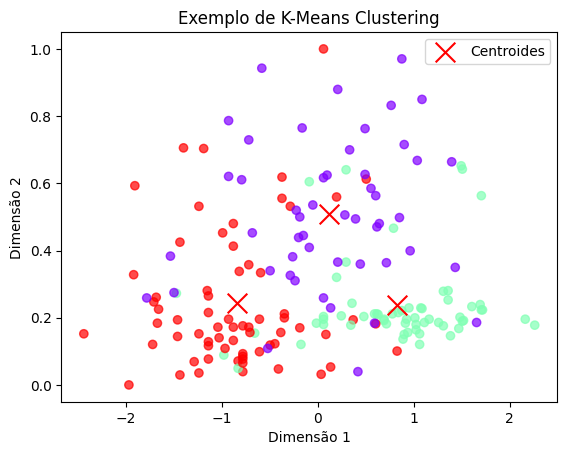

0.2300895355876754


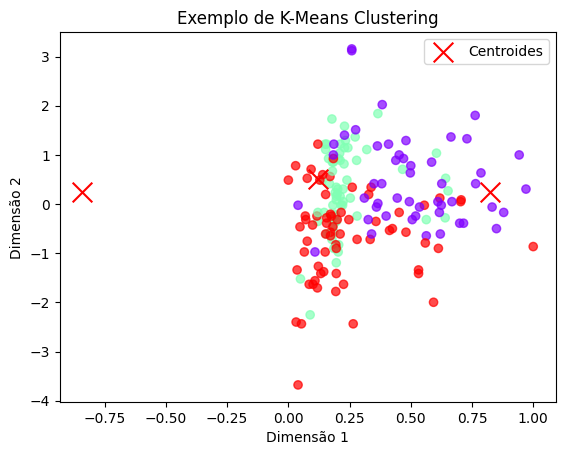

0.2300895355876754


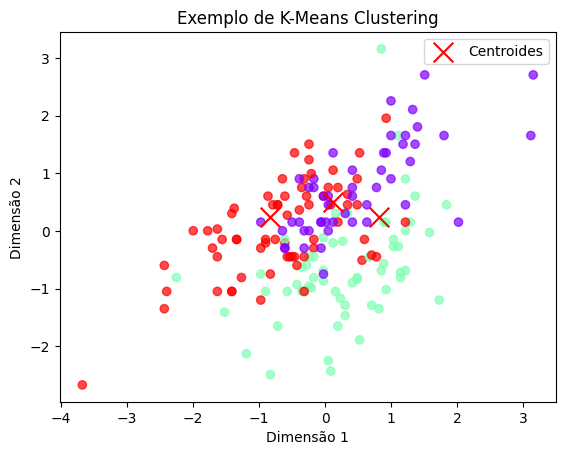

0.2300895355876754


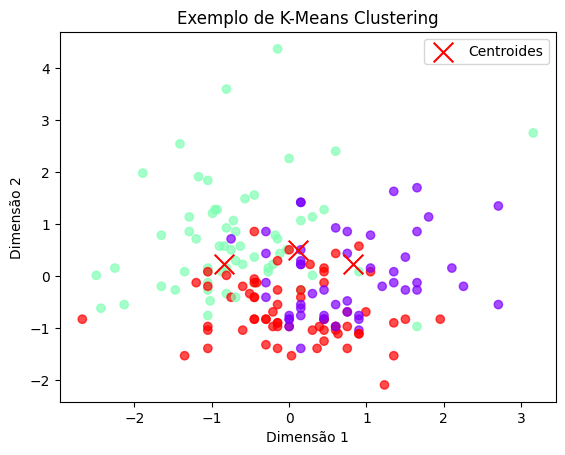

0.2300895355876754


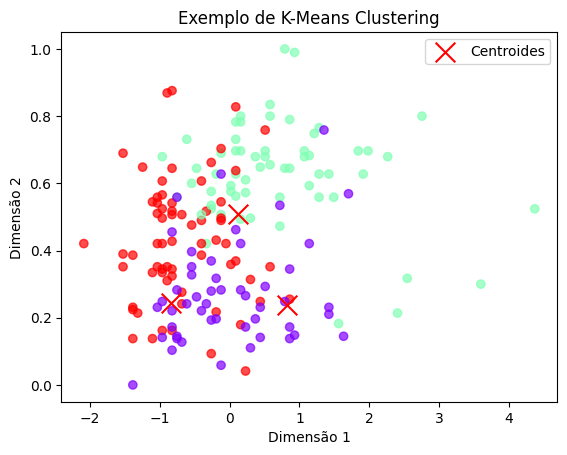

0.2300895355876754


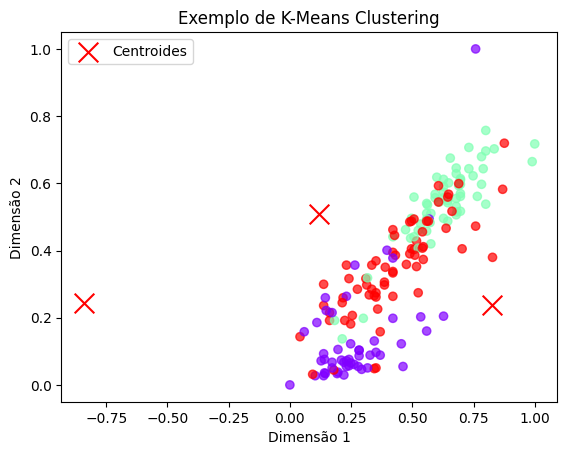

0.2300895355876754


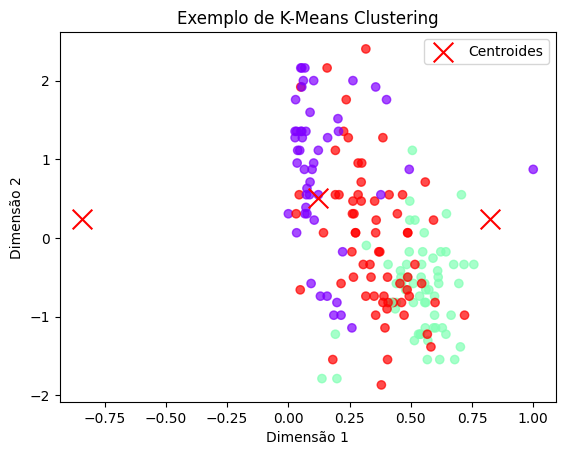

0.2300895355876754


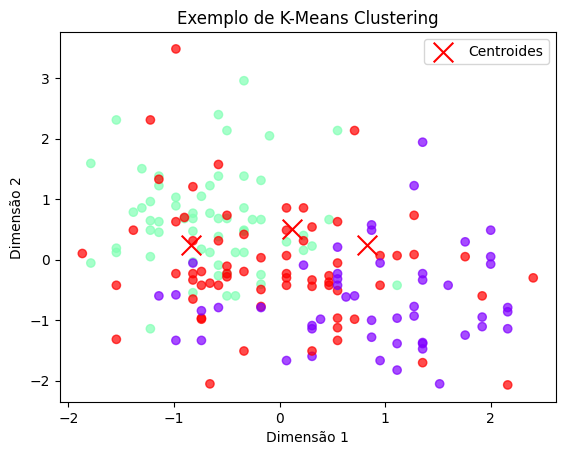

0.2300895355876754


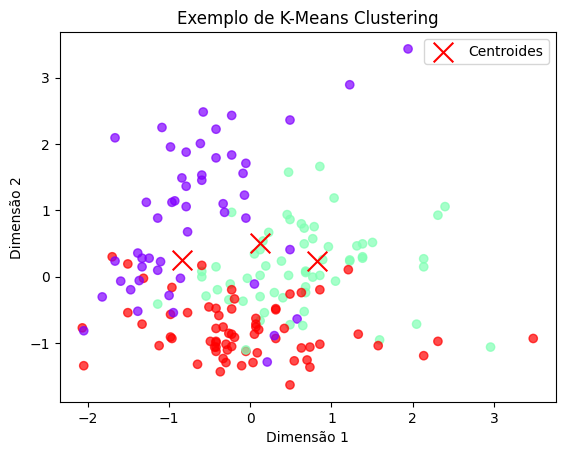

0.2300895355876754


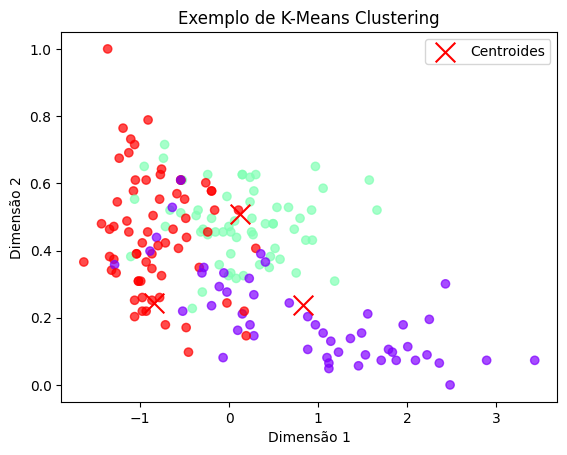

0.2300895355876754


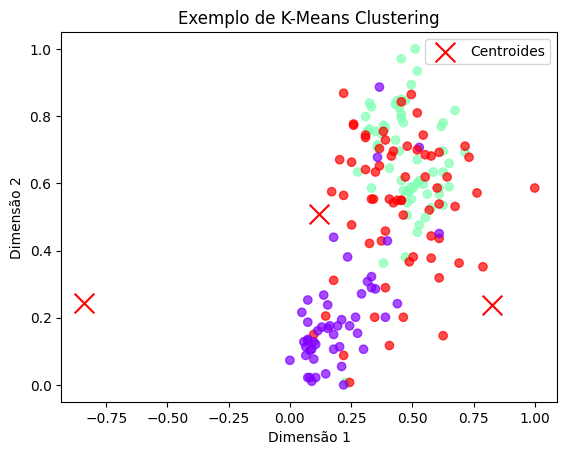

0.2300895355876754


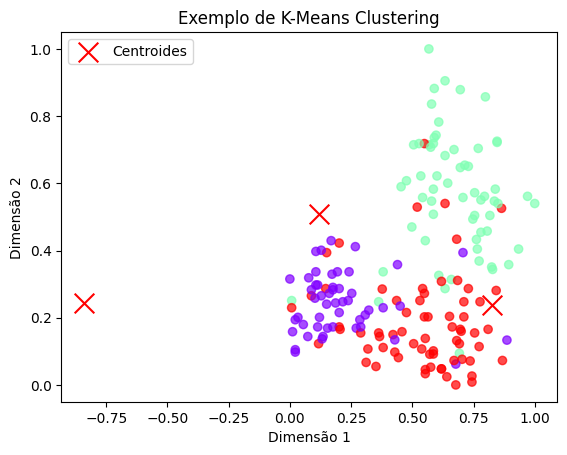

0.2300895355876754


<Figure size 640x480 with 0 Axes>

In [53]:
#visualizando os grupos
kmeans = KMeans(n_clusters=3)
kmeans.fit(dados)
labels = kmeans.labels_
for i in range(0,12,1):
# Visualize os clusters
    plt.scatter(X.iloc[:,i], X.iloc[:,i+1], c=labels, cmap='rainbow', alpha=0.7, )
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', color='red', s=200, label='Centroides')
    plt.xlabel('Dimensão 1')
    plt.ylabel('Dimensão 2')
    plt.title('Exemplo de K-Means Clustering')
    plt.legend()
    #display.clear_output( wait=True )
    plt.show()
    plt.gcf()
    time.sleep(3)
    score = silhouette_score(X, labels)
    print(score)


## Affinity Propagation


In [97]:


# Criando o modelo Affinity Propagation
affinity_propagation = AffinityPropagation(preference=-50).fit(X)
labels = affinity_propagation.labels_
# Calculando o Silhouette Score
score = silhouette_score(X, labels)
print(score)

0.20228628926813522


In [57]:
from sklearn.cluster import AffinityPropagation
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
import pandas as pd

# Gere dados de exemplo (você pode substituir isso pelos seus próprios dados)
#X, labels_true = make_blobs(n_samples=250, random_state=0, n_features=5, centers=3)

# Escolha uma faixa de valores para a preferência (parâmetro do Affinity Propagation)
preferences = range(-1000, -100, 100)

af_sil_score = []  # Pontuações de silhueta
no_of_clusters = []

for p in preferences:
    AF = AffinityPropagation(preference=p, max_iter=200).fit(X)
    no_of_clusters.append(len(AF.cluster_centers_))
    if len(AF.cluster_centers_) > 1:
        af_sil_score.append(silhouette_score(X, AF.labels_))
    else:
        af_sil_score.append(-1)

# Crie um DataFrame com os resultados
af_results = pd.DataFrame({'preferences': preferences,
                           'no_of_clusters': no_of_clusters,
                           'silhouette_score': af_sil_score})

print(af_results)


   preferences  no_of_clusters  silhouette_score
0        -1000               1         -1.000000
1         -900               1         -1.000000
2         -800               1         -1.000000
3         -700               1         -1.000000
4         -600               1         -1.000000
5         -500               1         -1.000000
6         -400               2          0.176173
7         -300               2          0.176173
8         -200               3          0.195695


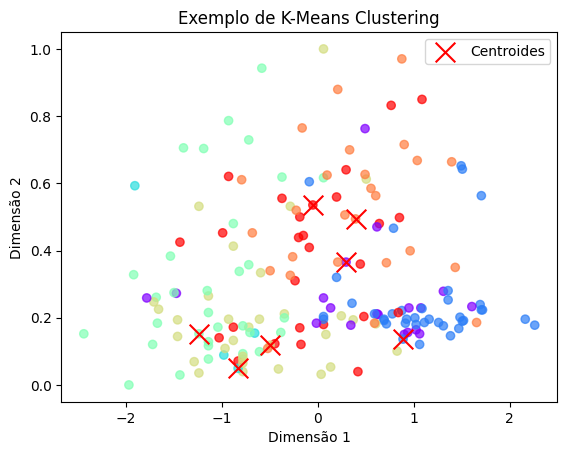

0.20228628926813522


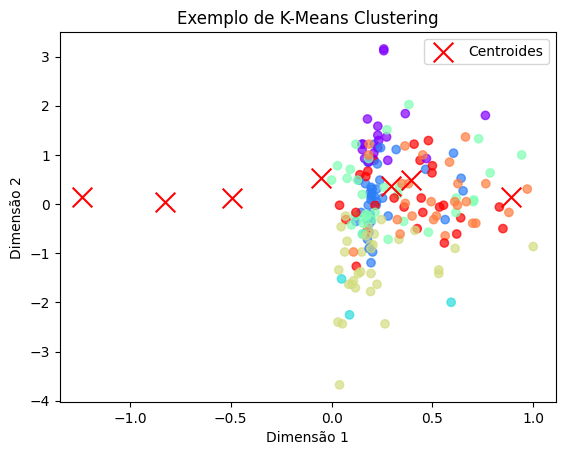

0.20228628926813522


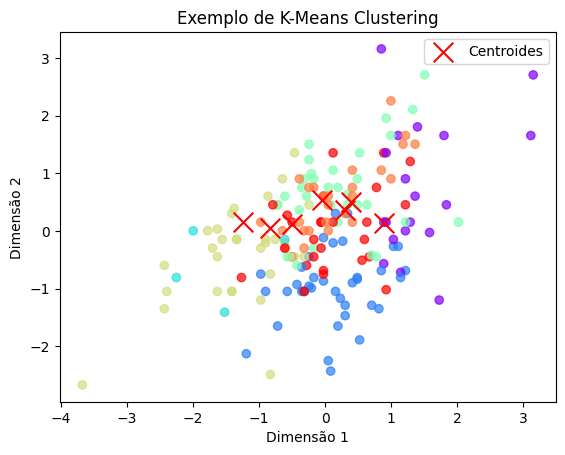

0.20228628926813522


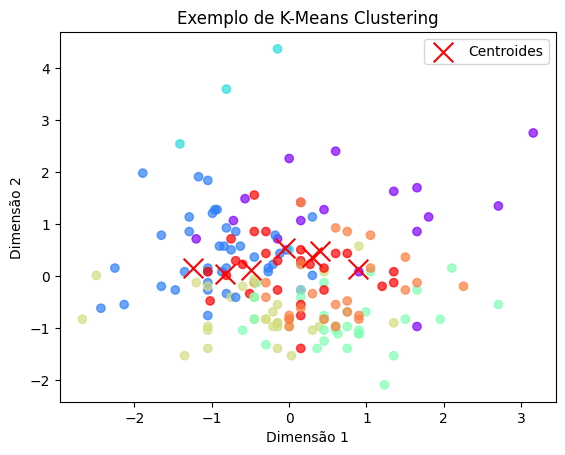

0.20228628926813522


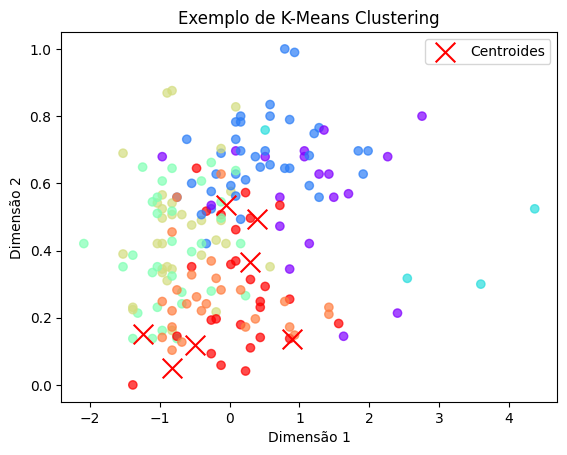

0.20228628926813522


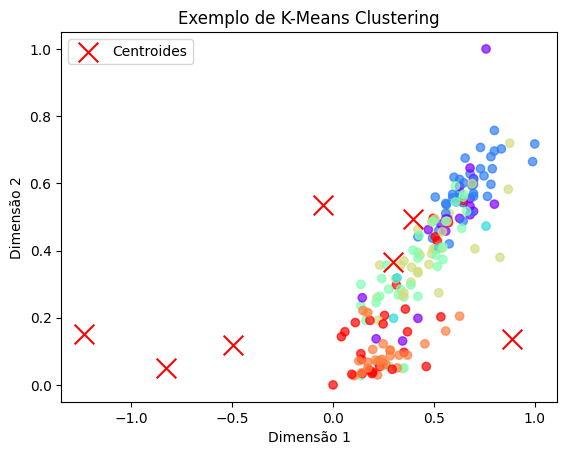

0.20228628926813522


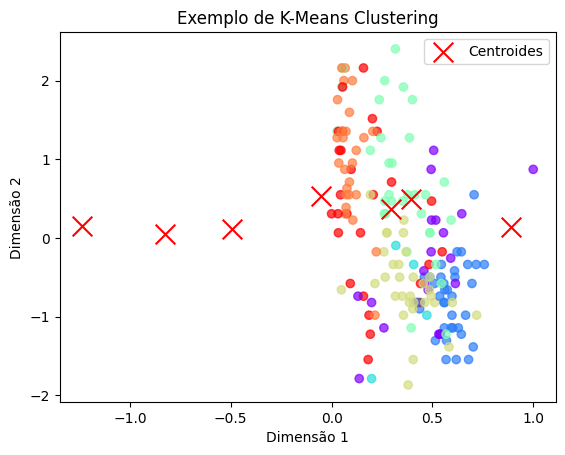

0.20228628926813522


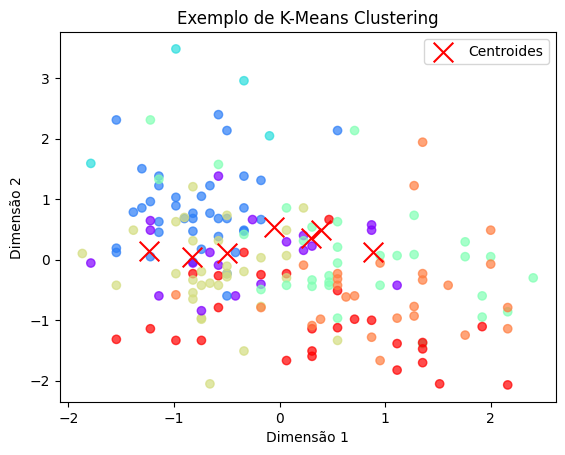

0.20228628926813522


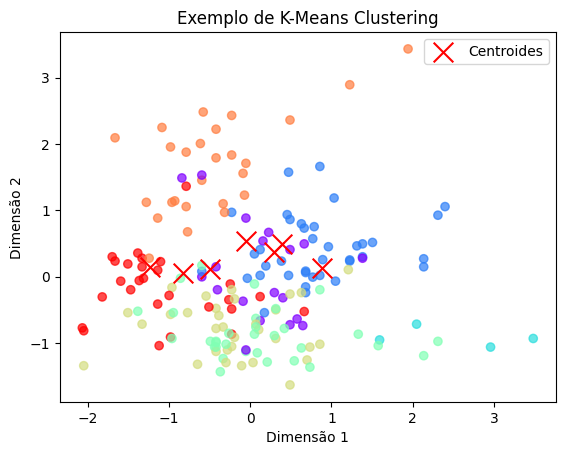

0.20228628926813522


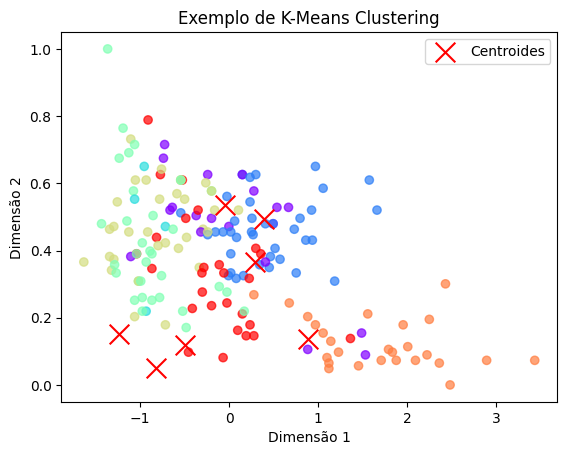

0.20228628926813522


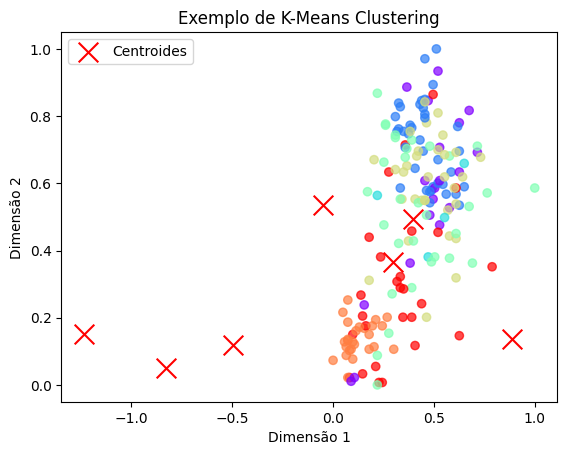

0.20228628926813522


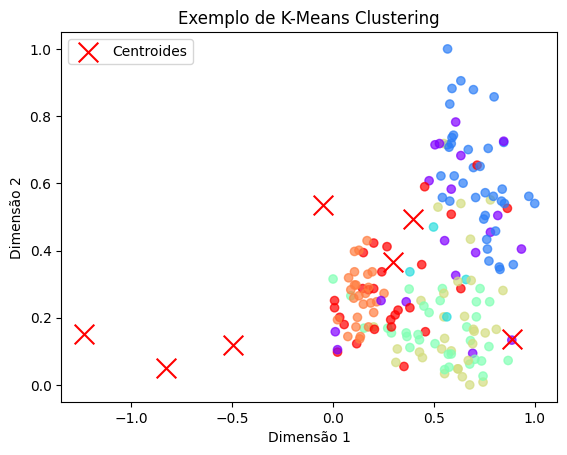

0.20228628926813522


<Figure size 640x480 with 0 Axes>

In [58]:
#visualizando os grupos
for i in range(0,12,1):
# Visualize os clusters
    plt.scatter(X.iloc[:,i], X.iloc[:,i+1], c=labels, cmap='rainbow', alpha=0.7, )
    plt.scatter(affinity_propagation.cluster_centers_[:, 0], affinity_propagation.cluster_centers_[:, 1], marker='x', color='red', s=200, label='Centroides')
    plt.xlabel('Dimensão 1')
    plt.ylabel('Dimensão 2')
    plt.title('Exemplo de K-Means Clustering')
    plt.legend()
    #display.clear_output( wait=True )
    plt.show()
    plt.gcf()
    time.sleep(3)
    score = silhouette_score(X, labels)
    print(score)

## 